<center><h1>Quality of Life 2020 Statistical Analysis</h1></center>

<center> <h3> by Jay Agaskar </h3></center>

Dataset from Kaggle: https://www.kaggle.com/dumbgeek/countries-dataset-2020?select=Quality+of+life+index+by+countries+2020.csv

<h2>1. Data Cleaning</h2>

In [1]:
import pandas as pd

df = pd.read_csv('Quality of life index by countries 2020.csv') 
df.head()

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61


The columns in this dataset were pulled from Numbeo. Quality of Life Index (higher is better) here is an estimation of overall quality of life by using an empirical formula which takes into account purchasing power index, pollution index (lower is better), property price to income ratio (lower is better), cost of living index (lower is better), safety index, health care index, traffic commute time index (lower is better) and climate index.

In [2]:
#there are no elements in the dataframe that are null, so I don't need to fill in any NaN
df.isnull().values.any()

False

<h2>2. Table Statistics</h2>

In [3]:
stat = df.describe()
stat

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,134.100375,59.751000,61.079125,64.840500,52.461250,13.332875,35.989250,53.227625,77.350250
std,33.921748,26.995155,13.808162,9.840011,19.772413,7.139386,8.236982,20.698200,16.520585
min,55.650000,13.520000,22.510000,42.800000,21.980000,2.790000,20.100000,11.550000,20.220000
25%,106.377500,36.560000,53.177500,56.357500,37.127500,8.830000,29.855000,36.157500,68.705000
50%,132.755000,55.620000,60.055000,66.000000,48.810000,11.680000,34.755000,57.125000,79.215000
75%,162.395000,83.087500,72.075000,72.565000,67.365000,14.935000,39.650000,67.435000,90.612500
max,192.670000,119.530000,88.140000,86.710000,122.400000,47.460000,61.080000,88.370000,99.790000


In [4]:
#transposed table
stat_transpose = stat.transpose()
stat_transpose

,count,mean,std,min,25%,50%,75%,max
Quality of Life Index,80.0,134.100375,33.921748,55.65,106.3775,132.755,162.3950,192.67
Purchasing Power Index,80.0,59.751000,26.995155,13.52,36.5600,55.620,83.0875,119.53
Safety Index,80.0,61.079125,13.808162,22.51,53.1775,60.055,72.0750,88.14
Health Care Index,80.0,64.840500,9.840011,42.80,56.3575,66.000,72.5650,86.71
Cost of Living Index,80.0,52.461250,19.772413,21.98,37.1275,48.810,67.3650,122.40
Property Price to Income Ratio,80.0,13.332875,7.139386,2.79,8.8300,11.680,14.9350,47.46
Traffic Commute Time Index,80.0,35.989250,8.236982,20.10,29.8550,34.755,39.6500,61.08
Pollution Index,80.0,53.227625,20.698200,11.55,36.1575,57.125,67.4350,88.37
Climate Index,80.0,77.350250,16.520585,20.22,68.7050,79.215,90.6125,99.79


From the table, we can see that Purchasing Power, a feature that makes up the Quality of Life, has the highest standard deviation out of the other features. This means that many countries are spread out in term of how powerful their currency is and seems to be the leading factor that affects Quality of Life. Cost of Living seems to have the highest disparity between the 50% percentile and mean which means Cost of Living has increased. Property Price to Income ratio has the lowest standard deviation too 
<br>
<br>
Normalize?

<h2>3. Preliminary Regression</h2>

In [20]:
#OLS Regression for

import statsmodels.api as sm
import numpy as np

X = df["Health Care Index"]
y = df["Purchasing Power Index"]
X = sm.add_constant(X) #add an intercept beta0

model = sm.OLS(y, X).fit(cov_type='HC1') 
#fit MacKinnon and White’s heteroskedasticity-robust standard errors
predictions = model.predict(X) #Assign prediction to model
    
df_fittedCPS = pd.DataFrame()
df_fittedCPS['Purchasing Power Index'] = predictions #fitted value
df_fittedCPS['Health Care Index'] = df['Health Care Index']

model.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Purchasing Power Index   R-squared:                       0.341
Model:                                OLS   Adj. R-squared:                  0.332
Method:                     Least Squares   F-statistic:                     51.14
Date:                    Thu, 14 Jan 2021   Prob (F-statistic):           4.06e-10
Time:                            14:09:57   Log-Likelihood:                -360.00
No. Observations:                      80   AIC:                             724.0
Df Residuals:                          78   BIC:                             728.8
Df Model:                               1                                         
Covariance Type:                      HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -44.0907     14.130     -3.120      0.002     -71.785     -16.397
Health Care Index     1.6015      0.224      7.151      0.000       1.163       2.040
==============================================================================
Omnibus:                        0.993   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                1.086
Skew:                           0.214   Prob(JB):                        0.581
Kurtosis:                       2.622   Cond. No.                         440.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

To run the OLS Regression, I am fitting it with the Heteroskedasticity-robust Standard Errors. From the results table, an R-Squared score of 0.71 indicates that the model explains 71% of the variability of the response data around the mean. 

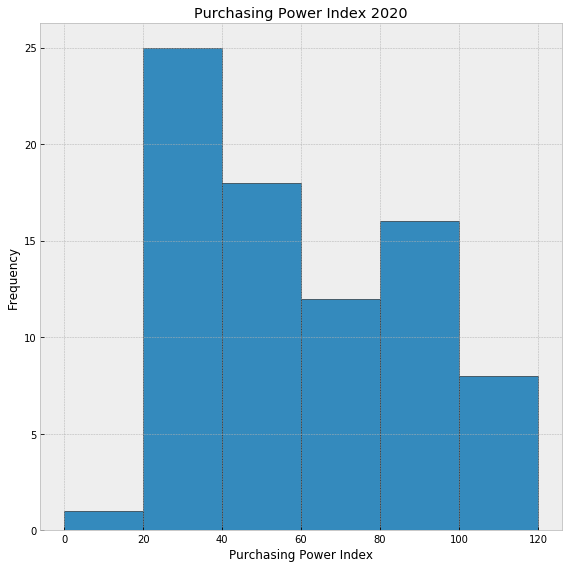

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
plt.style.use('bmh')
bins = [0, 20, 40, 60, 80, 100, 120]

hist = df['Purchasing Power Index']
plt.hist(hist, bins=bins, edgecolor='black')

plt.title("Purchasing Power Index 2020")
plt.xlabel("Purchasing Power Index")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


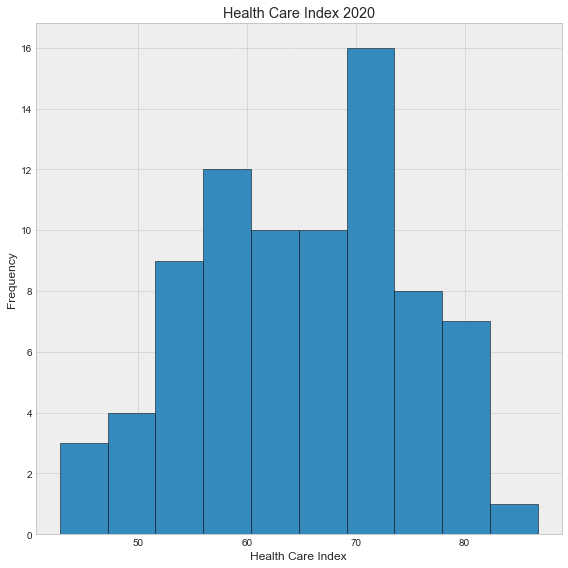

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
plt.style.use('bmh')

hist = df['Health Care Index']
plt.hist(hist, edgecolor='black')

plt.title("Health Care Index 2020")
plt.xlabel("Health Care Index")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


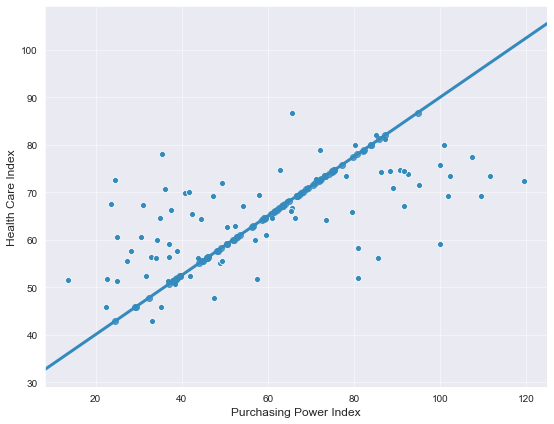

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

sns.set_style("darkgrid")

new_graph = sns.scatterplot(x="Purchasing Power Index", y="Health Care Index", data=df)

new_graph.set_ylabel("Health Care Index")
new_graph.set_xlabel("Purchasing Power Index")

ax = sns.regplot(x="Purchasing Power Index", y="Health Care Index", data=df_fittedCPS)

<h2>4. Logistic Regression, OVB, Interaction variables</h2>

<Figure size 1080x1080 with 0 Axes>

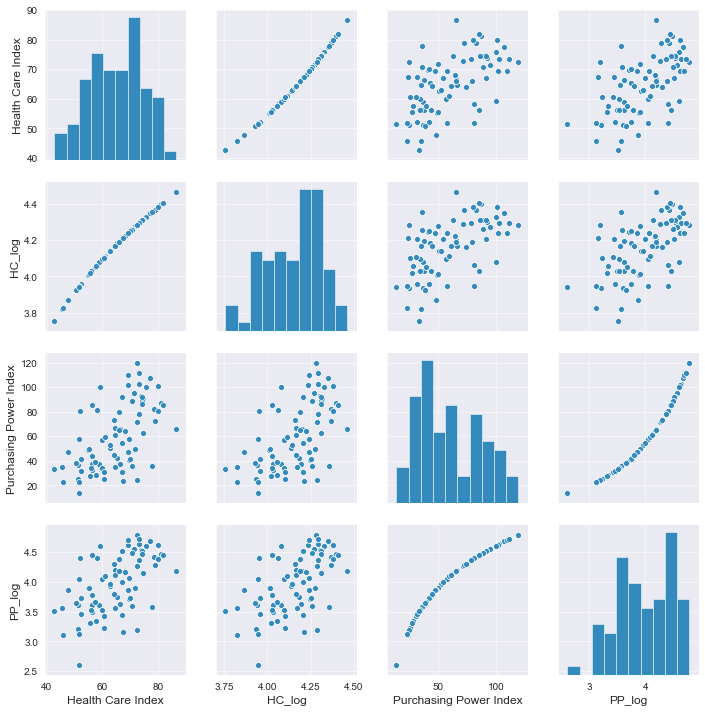

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 15))

sns.set_style("darkgrid")

df_log = pd.DataFrame()
df_log['Health Care Index'] = df['Health Care Index']
df_log['HC_log'] = np.log(df['Health Care Index'])
df_log['Purchasing Power Index'] = df['Purchasing Power Index']
df_log['PP_log'] = np.log(df['Purchasing Power Index'])

sns.pairplot(df_log)

In [29]:
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_log['const'] = 1
df_log['Safety Index'] = df['Safety Index']
df_log['Cost of Living Index'] = df['Cost of Living Index']
df_log['Pollution Index'] = df['Pollution Index']

# Create lists of variables to be used in each regression
X1 = ['const', 'PP_log']
X2 = ['const', 'Purchasing Power Index']
X3 = ['const', 'Purchasing Power Index', 'Safety Index']
X4 = ['const', 'Purchasing Power Index', 'Safety Index', 'Cost of Living Index']
X5 = ['const', 'Purchasing Power Index', 'Safety Index', 'Cost of Living Index', 'Pollution Index']

# Estimate an OLS regression for each set of variables
# Fit heteroskedatisticy on all regressions
reg1 = sm.OLS(df_log['HC_log'], df_log[X1]).fit(cov_type='HC1')
reg2 = sm.OLS(df_log['HC_log'], df_log[X2]).fit(cov_type='HC1')
reg3 = sm.OLS(df_log['HC_log'], df_log[X3]).fit(cov_type='HC1')
reg4 = sm.OLS(df_log['HC_log'], df_log[X4]).fit(cov_type='HC1')
reg5 = sm.OLS(df_log['HC_log'], df_log[X5]).fit(cov_type='HC1')

info_dict={'No. Observations' : lambda x: f"{int(x.nobs):d}",
           'R-squared' : lambda x: f"{x.rsquared:.3f}",
           'Adj R-squared' : lambda x: f"{x.rsquared_adj:.3f}"}

results_table = summary_col(results=[reg1,reg2,reg3, reg4, reg5],
                            float_format='%0.5f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4',
                                         'Model 5'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'PP_log',
                                             'Purchasing Power Index',
                                             'Safety Index',
                                             'Cost of Living Index',
                                             'Pollution Index'])

results_table.add_title('Side-by-side table of Regression results')

print(results_table)

print("\nVIF:")
v1 = reg1.model.exog
vif1 = [variance_inflation_factor(v1, i) for i in range(v1.shape[1])]
v2 = reg2.model.exog
vif2 = [variance_inflation_factor(v2, i) for i in range(v2.shape[1])]
v3 = reg3.model.exog
vif3 = [variance_inflation_factor(v3, i) for i in range(v3.shape[1])]
v4 = reg4.model.exog
vif4 = [variance_inflation_factor(v4, i) for i in range(v4.shape[1])]
v5 = reg5.model.exog
vif5 = [variance_inflation_factor(v5, i) for i in range(v5.shape[1])]
print("Model 1 ",vif1)
print("Model 2 ",vif2)
print("Model 3 ",vif3)
print("Model 4 ",vif4)
print("Model 5 ",vif5)

                  Side-by-side table of Regression results
                        Model 1    Model 2    Model 3    Model 4    Model 5  
-----------------------------------------------------------------------------
const                  3.41630*** 3.95931*** 3.90082*** 3.87366*** 3.98497***
                       (0.11544)  (0.03600)  (0.06332)  (0.06667)  (0.10806) 
PP_log                 0.18690***                                            
                       (0.02792)                                             
Purchasing Power Index            0.00336*** 0.00306*** 0.00189**  0.00151*  
                                  (0.00050)  (0.00054)  (0.00075)  (0.00079) 
Safety Index                                 0.00125    0.00101    0.00079   
                                             (0.00109)  (0.00109)  (0.00112) 
Cost of Living Index                                    0.00213*   0.00185*  
                                                        (0.00110)  (0.00112) 
Pollu